In [ ]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [ ]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True)

data = pd.concat([X,y],axis=1)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


plotting boxplots for some features


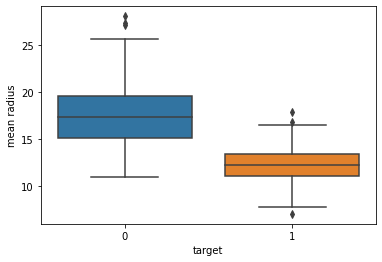

In [ ]:
ax = sns.boxplot(x="target", y="mean radius", data=data)

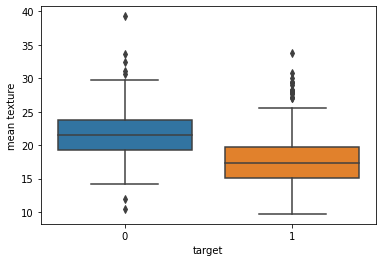

In [ ]:
ax = sns.boxplot(x="target", y="mean texture", data=data)

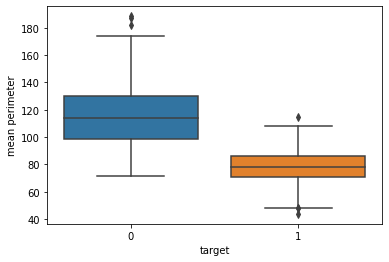

In [ ]:
ax = sns.boxplot(x="target", y="mean perimeter", data=data)

plotting FacetGrid for mean smoothness

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


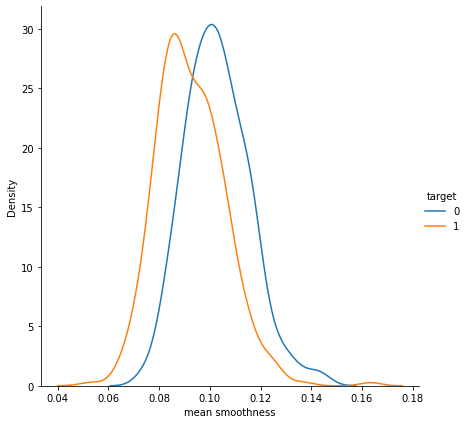

In [ ]:
sns.FacetGrid(data, hue="target", size=6) \
   .map(sns.kdeplot, "mean smoothness") \
   .add_legend()

plotting histogram for "worst perimeter" feature

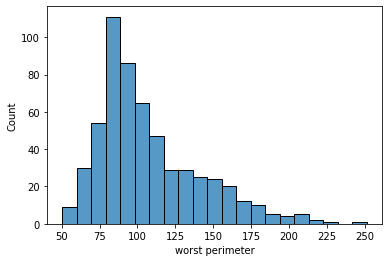

In [ ]:
sns.histplot(data["worst perimeter"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


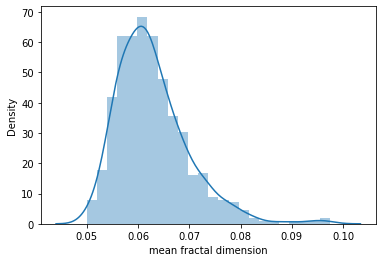

In [ ]:
sns.distplot(data["mean fractal dimension"])

plotting covariance matrix from random 4 columns of dataset features and target feature

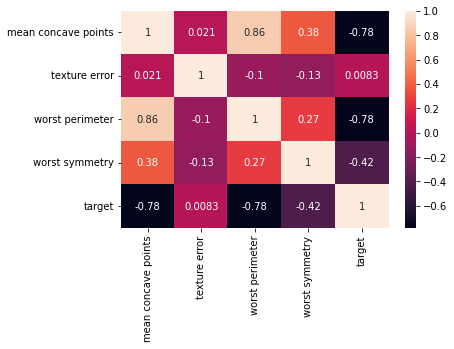

In [ ]:
import random
columns = X.columns
rand = random.choices(list(columns),k=4)
rand.append("target")
rand = data[rand]

sns.heatmap(rand.corr(), annot = True)

In [ ]:
X.shape

(569, 30)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

build model architecture

In [ ]:
model = Sequential()
model.add(Input(shape=(30,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))

model.add(Dense(2,activation="softmax"))

In [ ]:

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy",])

In [ ]:
model.fit(X_train,y_train,epochs=100,shuffle=True,validation_data =(X_test,y_test) )

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 43.9835 - accuracy: 0.3670 - val_loss: 11.7395 - val_accuracy: 0.3070
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 11.5943 - accuracy: 0.3319 - val_loss: 5.0605 - val_accuracy: 0.3421
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 4.9920 - accuracy: 0.4044 - val_loss: 1.0159 - val_accuracy: 0.7193
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8430 - accuracy: 0.7231 - val_loss: 0.6562 - val_accuracy: 0.7895
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.8747 - val_loss: 0.3089 - val_accuracy: 0.8947
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3550 - accuracy: 0.9077 - val_loss: 0.2766 - val_accuracy: 0.9211
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.9099 - val_loss: 0.2589 - val_accuracy: 0.9298
Epoch 8/1

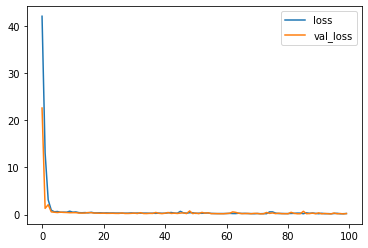

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label = 'val_loss')
plt.legend()

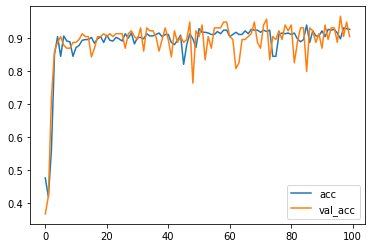

In [ ]:
plt.plot(model.history.history['accuracy'],label='acc')
plt.plot(model.history.history['val_accuracy'],label = 'val_acc')
plt.legend()

normalized dataset training

In [ ]:
cs = StandardScaler()

X = cs.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(30,)))
model2.add(Dense(8,activation="relu"))
model2.add(Dense(8,activation="relu"))
model2.add(Dense(2,activation="softmax"))



In [ ]:
model2.compile(optimizer='adam',
               loss="sparse_categorical_crossentropy", 
               metrics=["accuracy"]
            )

In [ ]:
model2.fit(X_train,y_train,epochs=100,shuffle=True,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 0.7222 - accuracy: 0.5868 - val_loss: 0.6172 - val_accuracy: 0.7193
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7846 - val_loss: 0.5383 - val_accuracy: 0.8684
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5033 - accuracy: 0.8681 - val_loss: 0.4698 - val_accuracy: 0.9123
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.9055 - val_loss: 0.4084 - val_accuracy: 0.9123
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3642 - accuracy: 0.9187 - val_loss: 0.3559 - val_accuracy: 0.9035
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.9253 - val_loss: 0.3135 - val_accuracy: 0.9035
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.9297 - val_loss: 0.2802 - val_accuracy: 0.9035
Epoch 8/100


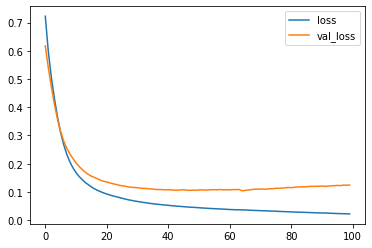

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model2.history.history['loss'],label='loss')
plt.plot(model2.history.history['val_loss'],label = 'val_loss')
plt.legend()

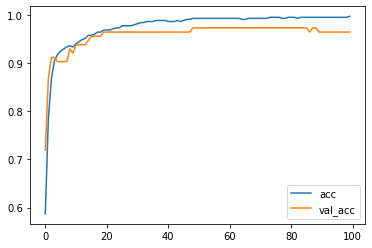

In [ ]:
plt.plot(model2.history.history['accuracy'],label='acc')
plt.plot(model2.history.history['val_accuracy'],label = 'val_acc')
plt.legend()